In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/camila/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_treino = pd.read_pickle('treino.gz')

In [3]:
#df_treino.info()

In [4]:
df = df_treino.copy()

In [5]:
df.head()

,id_pessoa,valor_emprestimo,custo_ativo,emprestimo_custo,agencia,revendedora,montadora,Current_pincode_ID,nascimento,emprego,...,sec_emp_san,sec_emp_tom,par_pri_emp,par_seg_emp,nov_emp_6m,def_emp_6m,tem_med_emp,tem_pri_emp,qtd_sol_emp,default
155653,487469,63418,75571,85.00,136,14189,86,3783,10-05-76,Salaried,...,0,0,3746800,0,3,0,0yrs 8mon,5yrs 5mon,0,0
98628,627194,42494,69042,65.18,1,22056,45,4923,05-02-97,Self employed,...,0,0,0,0,0,0,1yrs 1mon,1yrs 1mon,0,0
132937,636647,56909,69407,84.86,5,17980,86,3396,06-05-83,Salaried,...,0,0,0,0,4,0,0yrs 5mon,1yrs 4mon,0,0
29031,518430,69488,82782,85.00,19,14375,86,1838,07-01-83,Self employed,...,0,0,11840,0,2,0,1yrs 1mon,3yrs 1mon,7,0
67486,577759,54963,66783,84.90,74,22928,86,2578,01-01-94,Salaried,...,0,0,2658,0,0,0,0yrs 10mon,1yrs 4mon,0,0


### Manipulação das variáveis com datas (tem_pri_emp e tem_med_emp)

In [6]:
def duration_in_month(dataframe, column):

    dur_in_month = []

    for lista_aux in dataframe[column].str.split(' '):

        year = lista_aux[0]
        month = lista_aux[1]

        year_num = year.split('y')[0]
        month_num = month.split('m')[0]

        dur = int(year_num)*12 + int(month_num)
        
        dur_in_month.append(dur)
                    
    return dur_in_month

In [7]:
tem_med_emp_month = duration_in_month(df,'tem_med_emp')
tem_pri_emp_month = duration_in_month(df,'tem_pri_emp')

df = df.drop(columns = ['tem_med_emp','tem_pri_emp'])

df['tem_med_emp'] = tem_med_emp_month
df['tem_pri_emp'] = tem_pri_emp_month

### Manipulando emprego

In [8]:
df['emprego'].value_counts()

Self employed    102028
Salaried          78348
Name: emprego, dtype: int64

In [9]:
def transforma_emprego(valor):
    
    if valor == 'Self employed':
        return 0
    elif valor == 'Salaried':
        return 1
    else:
        return 2

In [10]:
df.emprego = df.emprego.apply(transforma_emprego)

In [11]:
df.emprego.value_counts()

0    102028
1     78348
2      6147
Name: emprego, dtype: int64

In [12]:
#checando a coluna [score_desc]

score_desc = df['score_desc'].values.tolist()
len(score_desc)

186523

In [13]:
df['score_desc'].value_counts()

No Bureau History Available                                93698
C-Very Low Risk                                            12838
A-Very Low Risk                                            11278
D-Very Low Risk                                             9093
B-Very Low Risk                                             7332
M-Very High Risk                                            7064
F-Low Risk                                                  6847
K-High Risk                                                 6566
H-Medium Risk                                               5449
E-Low Risk                                                  4628
I-Medium Risk                                               4353
G-Low Risk                                                  3201
J-High Risk                                                 3005
Not Scored: Sufficient History Not Available                3000
Not Scored: Not Enough Info available on the customer       2926
Not Scored: No Activity s

In [14]:
lista_score_cod = []

for elemento in score_desc:
    if elemento[0] == 'A':
        cod = 14
    elif elemento[0] == 'B':
        cod = 13
    elif elemento[0] == 'C':
        cod = 12
    elif elemento[0] == 'D':
        cod = 11
    elif elemento[0] == 'E':
        cod = 10
    elif elemento[0] == 'F':
        cod = 9
    elif elemento[0] == 'G':
        cod = 8
    elif elemento[0] == 'H':
        cod = 7
    elif elemento[0] == 'I':
        cod = 6
    elif elemento[0] == 'J':
        cod = 5
    elif elemento[0] == 'K':
        cod = 4
    elif elemento[0] == 'L':
        cod = 3
    elif elemento[0] == 'M':
        cod = 2
    elif elemento[0:3] == 'Not': 
        cod = 1
    else:
        cod = 0
    
    lista_score_cod.append(cod)

print(len(lista_score_cod))

186523


In [15]:
df.insert(21, "score_cod", lista_score_cod)

In [16]:
df = df.drop(['score_desc'], axis = 1)

In [17]:
df['score_cod'].value_counts()

0     93698
12    12838
14    11278
1     10264
11     9093
13     7332
2      7064
9      6847
4      6566
7      5449
10     4628
6      4353
8      3201
5      3005
3       907
Name: score_cod, dtype: int64

### removendo flags e variáveis que não acrescentam informações ou que podem haver conflitos éticos, como:

In [18]:


clns=['agencia','revendedora','montadora','Current_pincode_ID','nascimento','funcionario',
      'flag_telefone','flag_aadhar','flag_pan','flag_eleitor','flag_cmotorista',
      'flag_passaporte','data_contrato']

df = df.drop(columns = clns)

In [19]:
df.shape

(186523, 28)

In [20]:
df.loc[df['sec_emp_abt']<0].shape

(41, 28)

### São 41 linhas de "sec_emp_abt" com valores negativos, não representa nem 1% --> drop

In [21]:
df = df.drop(df.loc[df['sec_emp_abt']<0].index)

In [22]:
df.loc[df['pri_emp_abt']<0].shape

(362, 28)

### São 362 linhas de "pri_emp_abt" com valores negativos, não representa nem 1% --> drop

In [23]:
df = df.drop(df.loc[df['pri_emp_abt']<0].index)

In [24]:
df.shape

(186120, 28)

### Estatística descritiva básica do dataframe

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_pessoa,186120.0,535876.241522,6.833148e+04,417428.00,476780.75,535882.5,594991.25,6.710840e+05
valor_emprestimo,186120.0,54357.533269,1.302550e+04,13320.00,47145.00,53803.0,60410.00,9.905720e+05
custo_ativo,186120.0,75855.459875,1.905847e+04,37000.00,65718.00,70948.0,79183.00,1.628992e+06
emprestimo_custo,186120.0,74.757411,1.142738e+01,14.17,68.88,76.8,83.67,9.500000e+01
emprego,186120.0,0.485982,5.619181e-01,0.00,0.00,0.0,1.00,2.000000e+00
estado,186120.0,7.260230,4.478129e+00,1.00,4.00,6.0,10.00,2.200000e+01
score,186120.0,288.296717,3.382268e+02,0.00,0.00,0.0,678.00,8.900000e+02
score_cod,186120.0,4.137890,5.209828e+00,0.00,0.00,0.0,9.00,1.400000e+01
pri_qtd_tot_emp,186120.0,2.430668,5.241925e+00,0.00,0.00,0.0,3.00,4.530000e+02
pri_qtd_tot_emp_atv,186120.0,1.034918,1.943559e+00,0.00,0.00,0.0,1.00,1.440000e+02


In [26]:
# arquivo de metadados da base da dados

meta = pd.read_excel('metadados.xlsx')

In [27]:
meta

,Nome da Variável,Descrição,Unnamed: 2
0,id_pessoa,ID único da pessoa,NaN
1,default,Descumpriu compromisso de pagamento,NaN
2,valor_emprestimo,Valor total emprestado pela financeira,NaN
3,custo_ativo,Custo do ativo (veículo),NaN
4,emprestimo_custo,Razão entre valor emprestado e valor do ativo ...,NaN
5,agencia,Agência que realizou o empréstimo,NaN
6,revendedora,Revendedora do veículo,NaN
7,montadora,Montadora do veículo,NaN
8,id_cliente,Número de identificação do cliente,NaN
9,nascimento,Data de nascimento,NaN


In [28]:
df[['emprego','default','custo_ativo','valor_emprestimo','emprestimo_custo']]

,emprego,default,custo_ativo,valor_emprestimo,emprestimo_custo
155653,1,0,75571,63418,85.00
98628,0,0,69042,42494,65.18
132937,1,0,69407,56909,84.86
29031,0,0,82782,69488,85.00
67486,1,0,66783,54963,84.90
...,...,...,...,...,...
158885,2,0,71008,51078,73.23
144610,1,0,66042,38694,61.02
204677,0,1,66810,51913,78.75
68304,0,0,71460,60007,85.45


### variável a ser predita é default, quanto de descumprimento temos? defalut = 1

In [29]:
df.default.value_counts(1)

0    0.78343
1    0.21657
Name: default, dtype: float64

In [30]:
df.columns

Index(['id_pessoa', 'valor_emprestimo', 'custo_ativo', 'emprestimo_custo',
       'emprego', 'estado', 'score', 'score_cod', 'pri_qtd_tot_emp',
       'pri_qtd_tot_emp_atv', 'pri_qtd_tot_def', 'pri_emp_abt', 'pri_emp_san',
       'pri_emp_tom', 'sec_qtd_tot_emp', 'sec_qtd_tot_emp_atv',
       'sec_qtd_tot_def', 'sec_emp_abt', 'sec_emp_san', 'sec_emp_tom',
       'par_pri_emp', 'par_seg_emp', 'nov_emp_6m', 'def_emp_6m', 'qtd_sol_emp',
       'default', 'tem_med_emp', 'tem_pri_emp'],
      dtype='object')

In [31]:
## imports para modelo e métricas

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [32]:
y = df['default']
X = df.drop(['default'], axis=1)

In [33]:
df.shape

(186120, 28)

In [34]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.5, random_state=123)
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((93060, 27), (93060, 27), (93060,), (93060,))

In [35]:
from sklearn.metrics import log_loss

In [36]:
# A baseline é de 0.5220, ou seja, meu modelo deve ser capaz de minimizar, log_loss<0.5220

baseline1 = np.ones(X_teste.shape[0])*y_treino.mean()
log_loss(y_teste, baseline1)

0.5220774235388375


### LITERATURA CONSULTADA PARA EXPERIMENTO 1 - MODELO RANDOM FOREST CLASSIFIER e KBEST

#confusion matrix: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

#select kbest: https://www.kaggle.com/jepsds/feature-selection-using-selectkbest?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com

In [37]:
%%time

## Random Forest Classifier com selectKbest (número de features "ótimo")

k_gini = [] #lista de ginis para diferenciar o melhor desempenho com cada k (features)
k_roc = []

for k in range(1,28):
    
    s = SelectKBest(score_func=f_classif, k=k)
    
    #usando nas var2 e depois com o k definido utilizo x_treino,y_treino no fit
    
    X_treino2 = s.fit_transform(X_treino,y_treino)
    X_teste2 = s.transform(X_teste) 
    
    modelo = RandomForestClassifier(n_estimators=100,n_jobs=2,random_state = 123)
    modelo.fit(X_treino2,y_treino)
    
    pred2 = modelo.predict_proba(X_teste2)[:,1]
   
    gini2 = 2*roc_auc_score(y_teste, pred2) - 1
    roc = roc_auc_score(y_teste, pred2)
    
    print("k = {} | roc = {} | gini = {} ".format(k, round(roc, 3), round(gini2, 3)))
    
    k_gini.append(gini2)
    k_roc.append(roc)

k = 1 | roc = 0.535 | gini = 0.07 
k = 2 | roc = 0.53 | gini = 0.061 
k = 3 | roc = 0.547 | gini = 0.095 
k = 4 | roc = 0.552 | gini = 0.105 
k = 5 | roc = 0.571 | gini = 0.141 
k = 6 | roc = 0.575 | gini = 0.15 
k = 7 | roc = 0.575 | gini = 0.151 
k = 8 | roc = 0.581 | gini = 0.163 
k = 9 | roc = 0.586 | gini = 0.172 
k = 10 | roc = 0.588 | gini = 0.176 
k = 11 | roc = 0.589 | gini = 0.177 
k = 12 | roc = 0.611 | gini = 0.222 
k = 13 | roc = 0.609 | gini = 0.217 
k = 14 | roc = 0.613 | gini = 0.226 
k = 15 | roc = 0.612 | gini = 0.225 
k = 16 | roc = 0.612 | gini = 0.224 
k = 17 | roc = 0.611 | gini = 0.223 
k = 18 | roc = 0.615 | gini = 0.23 
k = 19 | roc = 0.614 | gini = 0.229 
k = 20 | roc = 0.615 | gini = 0.231 
k = 21 | roc = 0.617 | gini = 0.233 
k = 22 | roc = 0.614 | gini = 0.227 
k = 23 | roc = 0.616 | gini = 0.231 
k = 24 | roc = 0.614 | gini = 0.229 
k = 25 | roc = 0.613 | gini = 0.227 
k = 26 | roc = 0.615 | gini = 0.23 
k = 27 | roc = 0.614 | gini = 0.228 
CPU times: user

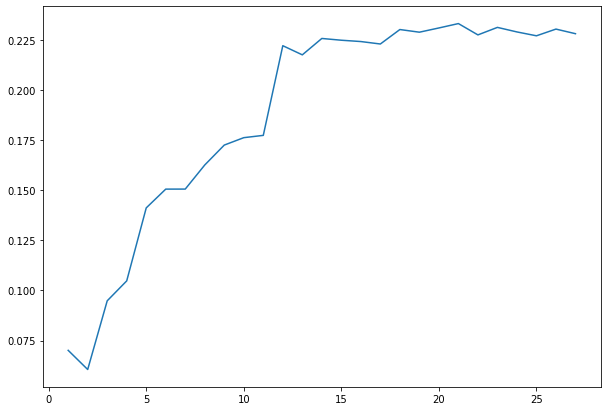

In [38]:
pd.Series(k_gini, index=range(1,28)).plot(figsize=(10,7));

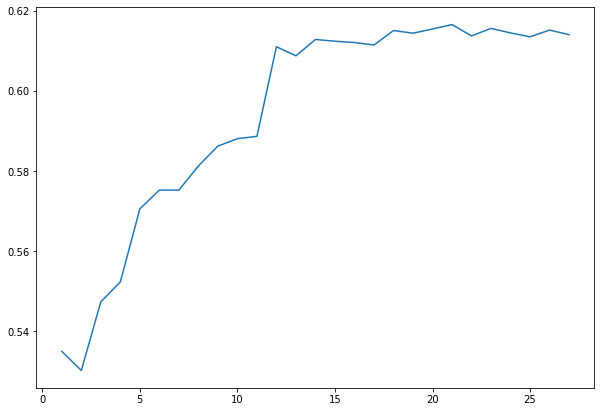

In [39]:
# parace que um intervalo de 12 a 27 variáveis o gini parece estável em appx 0.2
# podemos visualizar a partir do roc_auc também

pd.Series(k_roc, index=range(1,28)).plot(figsize=(10,7));

In [40]:
# k = 20 parece estar em intervalo estável

In [41]:
# fazendo kBest com as 20 variáveis

s = SelectKBest(score_func=f_classif, k=20)

s.fit(X_treino,y_treino)

SelectKBest(k=20)

In [42]:
# verificando quais 20 variáveis selecionadas através do get_support

mask = s.get_support()
X_teste.columns[mask]

Index(['id_pessoa', 'valor_emprestimo', 'custo_ativo', 'emprestimo_custo',
       'emprego', 'estado', 'score', 'score_cod', 'pri_qtd_tot_emp',
       'pri_qtd_tot_emp_atv', 'pri_qtd_tot_def', 'pri_emp_abt', 'pri_emp_san',
       'pri_emp_tom', 'par_pri_emp', 'nov_emp_6m', 'def_emp_6m', 'qtd_sol_emp',
       'tem_med_emp', 'tem_pri_emp'],
      dtype='object')

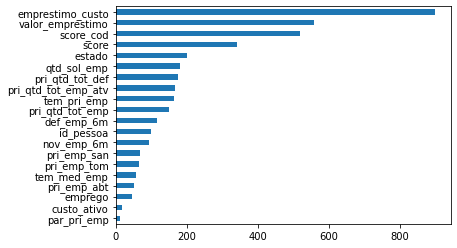

In [43]:
# plotando sorted e tail(20) para ver as maiores em gráfico de barras, no x estão os scores e y as variáveis

pd.Series(s.scores_, index=X_treino.columns).sort_values().tail(20).plot.barh();

In [44]:
# DENTRE AS VARIÁVEIS SELECIONADAS AS 5 PRIMEIRAS SÃO: 

# - EMPRESTIMO CUSTO, VALOR EMPRESTIMO, SCORE COD, SCORE E ESTADO

### MODELOS

### - Definição da nova base - selecionada previamente com KBEST

In [45]:
df_treino = df[['id_pessoa', 'default','valor_emprestimo', 'custo_ativo', 'emprestimo_custo',
       'emprego', 'estado', 'score', 'score_cod', 'pri_qtd_tot_emp',
       'pri_qtd_tot_emp_atv', 'pri_qtd_tot_def', 'pri_emp_abt', 'pri_emp_san',
       'pri_emp_tom', 'par_pri_emp', 'nov_emp_6m', 'def_emp_6m', 'qtd_sol_emp',
       'tem_med_emp', 'tem_pri_emp']]

In [46]:
df_treino.shape

(186120, 21)

### - Estatística descritiva básica do novo dataframe de treino

In [47]:
df_treino.describe().T

,count,mean,std,min,25%,50%,75%,max
id_pessoa,186120.0,535876.241522,6.833148e+04,417428.00,476780.75,535882.5,594991.25,6.710840e+05
default,186120.0,0.216570,4.119081e-01,0.00,0.00,0.0,0.00,1.000000e+00
valor_emprestimo,186120.0,54357.533269,1.302550e+04,13320.00,47145.00,53803.0,60410.00,9.905720e+05
custo_ativo,186120.0,75855.459875,1.905847e+04,37000.00,65718.00,70948.0,79183.00,1.628992e+06
emprestimo_custo,186120.0,74.757411,1.142738e+01,14.17,68.88,76.8,83.67,9.500000e+01
emprego,186120.0,0.485982,5.619181e-01,0.00,0.00,0.0,1.00,2.000000e+00
estado,186120.0,7.260230,4.478129e+00,1.00,4.00,6.0,10.00,2.200000e+01
score,186120.0,288.296717,3.382268e+02,0.00,0.00,0.0,678.00,8.900000e+02
score_cod,186120.0,4.137890,5.209828e+00,0.00,0.00,0.0,9.00,1.400000e+01
pri_qtd_tot_emp,186120.0,2.430668,5.241925e+00,0.00,0.00,0.0,3.00,4.530000e+02


### - Divisão em treino e teste

In [48]:
y2 = df_treino['default']
x2 = df_treino.drop(['default'], axis=1)

In [49]:
xtreino, xteste, ytreino, yteste = train_test_split(x2, y2, train_size=0.5, random_state=123)
xtreino.shape, xteste.shape, ytreino.shape, yteste.shape

((93060, 20), (93060, 20), (93060,), (93060,))

In [50]:
ytreino.mean()

0.21692456479690522

In [51]:
baseline = np.ones(xteste.shape[0])*ytreino.mean()
log_loss(yteste, baseline)

0.5220774235388375

## Random Forest com as 20 variáveis selecionadas com KBest anteriormente

In [52]:
%%time

modelo = RandomForestClassifier(n_estimators=1000,n_jobs=2,random_state = 123)
modelo.fit(xtreino, ytreino)

y_pred_proba = modelo.predict_proba(xteste)[:,1]

gini = 2*roc_auc_score(yteste, y_pred_proba) - 1
roc = roc_auc_score(yteste, y_pred_proba)

y_pred_cat = modelo.predict(xteste)

print("| roc = {} | gini = {} |".format(round(roc, 3), round(gini, 3)))

print(log_loss(yteste, y_pred_proba))

| roc = 0.621 | gini = 0.242 |
0.5144726092490324
CPU times: user 7min 45s, sys: 2.54 s, total: 7min 47s
Wall time: 3min 57s


###  - log_loss do modelo Random Forest Classifier deu ligeiramente abaixo do baseline

### -  A baseline tem log_loss de 0.5220, ou seja, meu modelo deve ser capaz de minimizar a log_loss (modelo<0.5220)

#### teoria sobre calibração de probabilidades
https://scikit-learn.org/stable/modules/calibration.html

In [53]:
# ocorrência de default = 1, ou seja, descumpriu pagamento em ytreino

ytreino.mean()

0.21692456479690522

In [54]:
# ocorrência de default = 1, ou seja, descumpriu pagamento em yteste

yteste.mean()

0.2162153449387492

## Regressão logística com a seleção de variáveis do KBEST

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
y_rl = df_treino['default']
x_rl = df_treino.drop(['default'], axis=1)

xtreino_rl, xteste_rl, ytreino_rl, yteste_rl = train_test_split(x_rl, y_rl, train_size=0.5, random_state=321)
xtreino_rl.shape, xteste_rl.shape, ytreino_rl.shape, yteste_rl.shape

((93060, 20), (93060, 20), (93060,), (93060,))

In [57]:
%%time

modelo_RL = LogisticRegression(max_iter = 10000, random_state = 321)

modelo_RL.fit(xtreino_rl, ytreino_rl)

y_p_proba = modelo_RL.predict_proba(xteste_rl)[:,1]
y_p_cat = modelo_RL.predict(xteste_rl)

gini_rl = 2*roc_auc_score(yteste_rl, y_p_proba) - 1
roc_rl = roc_auc_score(yteste_rl, y_p_proba)


print("| roc = {} | gini = {} |".format(round(roc_rl, 3), round(gini_rl, 3)))

print(log_loss(yteste_rl, y_p_proba))

| roc = 0.564 | gini = 0.129 |
0.5181083252660371
CPU times: user 9.1 s, sys: 4.24 s, total: 13.3 s
Wall time: 3.74 s


### -  log_loss do modelo Logistic Regression deu ligeiramente abaixo do baseline, porém o gini está abaixo do gini para Random Forest

### -  A baseline tem log_loss de 0.5220, ou seja, meu modelo deve ser capaz de minimizar a log_loss (modelo<0.5220)

### CONCLUSÃO